# CleanCarChecker


In [40]:
import tensorflow as tf
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from PIL import Image
import datetime, os
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


## Preprocessing of data
* Normalizing input (rescale)
* Slight rotation and width/height shift
* Vertical flips

In [41]:
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.05,
    height_shift_range=0.05,
    brightness_range=(0.9, 1.1),
    horizontal_flip=True
)

## Load training data

* Size: 500 x 250
* Batch size of 32 is good default value

In [42]:
train_dir = "./data_clean"
IMG_WIDTH = 300
IMG_HEIGHT = 250
batch_size = 32

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))

print(train_data_gen.class_indices)

Found 1793 images belonging to 2 classes.
{'cars': 0, 'e-cars': 1}


## Display samples from training set
* for verification of image processing

In [4]:
#sample_training_images, labels = next(train_data_gen)
#class_label = {v:k for k,v in train_data_gen.class_indices.items()}
#fig, axes = plt.subplots(8, 4, figsize=(20,20))
#axes = axes.flatten()
#for img, label, ax in zip(sample_training_images, labels, axes):
#    ax.set_title(class_label[np.argmax(label)])
#    ax.imshow(img)
#    ax.axis('off')
#plt.tight_layout()

## Building the model

* First layer (Flatten) transforms the 2D-array (IMG_WIDTH x IMG_HEIGHT) to a 1-D array
* Last layer uses as activation "softmax" with number of classes (2) as argument for one-hot encoding

* All layers are fully-connected

In [43]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (7, 7), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),  
    tf.keras.layers.Conv2D(32, (5, 5)),
    tf.keras.layers.Conv2D(32, (2, 2)),
    tf.keras.layers.MaxPooling2D(2, 4),
    tf.keras.layers.Conv2D(32, (2, 2)),
    tf.keras.layers.Conv2D(32, (2, 2)),    
    tf.keras.layers.MaxPooling2D(2, 4),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, 'relu'),
    tf.keras.layers.Dense(train_data_gen.num_classes, 'softmax')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 244, 294, 32)      4736      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 240, 290, 32)      25632     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 239, 289, 32)      4128      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 60, 72, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 59, 71, 32)        4128      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 58, 70, 32)        4128      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 18, 32)       

## Train the model

In [44]:
snapshot_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="./snapshots",
    verbose=1)

def skip_broken_images(gen):
    while True:
        try:
            data, labels = next(gen)
            yield data, labels
        except GeneratorExit:
            break
        except:
            pass

In [ ]:
history = model.fit_generator(
    skip_broken_images(train_data_gen),
    steps_per_epoch= int(round(train_data_gen.samples / batch_size)),
    epochs=10,
    callbacks=[snapshot_callback]
)

Epoch 1/10
 4/56 [=>............................] - ETA: 1:34 - loss: 3.4688 - accuracy: 0.5859

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


 6/56 [==>...........................] - ETA: 1:44 - loss: 4.1548 - accuracy: 0.6042

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


 8/56 [===>..........................] - ETA: 1:37 - loss: 5.0986 - accuracy: 0.5742

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


24/56 [===========>..................] - ETA: 1:04 - loss: 5.6293 - accuracy: 0.5117

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


29/56 [==============>...............] - ETA: 56s - loss: 5.3330 - accuracy: 0.5054

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


30/56 [===============>..............] - ETA: 55s - loss: 5.2433 - accuracy: 0.5000

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


36/56 [==================>...........] - ETA: 42s - loss: 4.6399 - accuracy: 0.4965

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


39/56 [===================>..........] - ETA: 35s - loss: 4.3721 - accuracy: 0.4976

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


42/56 [=====================>........] - ETA: 29s - loss: 4.1139 - accuracy: 0.4940

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


47/56 [========================>.....] - ETA: 18s - loss: 3.7474 - accuracy: 0.5003

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


55/56 [============================>.] - ETA: 2s - loss: 3.3075 - accuracy: 0.4905
Epoch 00001: saving model to ./snapshots


D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


INFO:tensorflow:Assets written to: ./snapshots\assets
56/56 [==============================] - 116s 2s/step - loss: 3.2616 - accuracy: 0.4918
Epoch 2/10
13/56 [=====>........................] - ETA: 1:28 - loss: 0.6931 - accuracy: 0.5024

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


20/56 [=========>....................] - ETA: 1:15 - loss: 0.6929 - accuracy: 0.5125

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


21/56 [==========>...................] - ETA: 1:13 - loss: 0.6928 - accuracy: 0.5149

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


23/56 [===========>..................] - ETA: 1:08 - loss: 0.6927 - accuracy: 0.5163

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


26/56 [============>.................] - ETA: 1:03 - loss: 0.6928 - accuracy: 0.5132

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


27/56 [=============>................] - ETA: 1:02 - loss: 0.6930 - accuracy: 0.5081

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


30/56 [===============>..............] - ETA: 57s - loss: 0.6929 - accuracy: 0.5073

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


33/56 [================>.............] - ETA: 52s - loss: 0.6927 - accuracy: 0.5104

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


42/56 [=====================>........] - ETA: 29s - loss: 0.6931 - accuracy: 0.5149

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/56 [======================>.......] - ETA: 27s - loss: 0.6932 - accuracy: 0.5145

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


45/56 [=======================>......] - ETA: 23s - loss: 0.6932 - accuracy: 0.5110

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


55/56 [============================>.] - ETA: 2s - loss: 0.6933 - accuracy: 0.5055

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "



Epoch 00002: saving model to ./snapshots
INFO:tensorflow:Assets written to: ./snapshots\assets
56/56 [==============================] - 121s 2s/step - loss: 0.6933 - accuracy: 0.5037
Epoch 3/10
 2/56 [>.............................] - ETA: 49s - loss: 0.6936 - accuracy: 0.4531

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


 3/56 [>.............................] - ETA: 2:02 - loss: 0.6932 - accuracy: 0.4792

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


 5/56 [=>............................] - ETA: 2:08 - loss: 0.6932 - accuracy: 0.4750

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


 6/56 [==>...........................] - ETA: 2:16 - loss: 0.6932 - accuracy: 0.4844

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


 9/56 [===>..........................] - ETA: 1:53 - loss: 0.6932 - accuracy: 0.4931

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


12/56 [=====>........................] - ETA: 1:45 - loss: 0.6931 - accuracy: 0.4896

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


13/56 [=====>........................] - ETA: 1:42 - loss: 0.6932 - accuracy: 0.4808

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


22/56 [==========>...................] - ETA: 1:14 - loss: 0.6932 - accuracy: 0.4915

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


23/56 [===========>..................] - ETA: 1:13 - loss: 0.6931 - accuracy: 0.4973

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


25/56 [============>.................] - ETA: 1:07 - loss: 0.6932 - accuracy: 0.4938

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


27/56 [=============>................] - ETA: 1:01 - loss: 0.6931 - accuracy: 0.4994

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


30/56 [===============>..............] - ETA: 54s - loss: 0.6931 - accuracy: 0.5038

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


32/56 [================>.............] - ETA: 49s - loss: 0.6931 - accuracy: 0.5035

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


33/56 [================>.............] - ETA: 47s - loss: 0.6931 - accuracy: 0.5054

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


35/56 [=================>............] - ETA: 43s - loss: 0.6931 - accuracy: 0.5106

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


41/56 [====================>.........] - ETA: 31s - loss: 0.6931 - accuracy: 0.5144

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


43/56 [======================>.......] - ETA: 27s - loss: 0.6931 - accuracy: 0.5160

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


46/56 [=======================>......] - ETA: 21s - loss: 0.6931 - accuracy: 0.5198

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


55/56 [============================>.] - ETA: 2s - loss: 0.6931 - accuracy: 0.5211
Epoch 00003: saving model to ./snapshots


D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


INFO:tensorflow:Assets written to: ./snapshots\assets
56/56 [==============================] - 119s 2s/step - loss: 0.6931 - accuracy: 0.5196
Epoch 4/10
 1/56 [..............................] - ETA: 1:53 - loss: 0.6895 - accuracy: 0.6250

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


 4/56 [=>............................] - ETA: 1:58 - loss: 0.6922 - accuracy: 0.5312

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


 8/56 [===>..........................] - ETA: 1:51 - loss: 0.6928 - accuracy: 0.5234

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


10/56 [====>.........................] - ETA: 1:49 - loss: 0.6928 - accuracy: 0.5156

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


14/56 [======>.......................] - ETA: 1:34 - loss: 0.6923 - accuracy: 0.5252

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


15/56 [=======>......................] - ETA: 1:38 - loss: 0.6924 - accuracy: 0.5301

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


16/56 [=======>......................] - ETA: 1:38 - loss: 0.6925 - accuracy: 0.5260

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


20/56 [=========>....................] - ETA: 1:28 - loss: 0.6930 - accuracy: 0.5140

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


24/56 [===========>..................] - ETA: 1:20 - loss: 0.6927 - accuracy: 0.5142

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


35/56 [=================>............] - ETA: 49s - loss: 0.6930 - accuracy: 0.5115

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


37/56 [==================>...........] - ETA: 43s - loss: 0.6929 - accuracy: 0.5117

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


44/56 [======================>.......] - ETA: 26s - loss: 0.6929 - accuracy: 0.5145

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


45/56 [=======================>......] - ETA: 24s - loss: 0.6929 - accuracy: 0.5170

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


52/56 [==========================>...] - ETA: 8s - loss: 0.6928 - accuracy: 0.5196 

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


55/56 [============================>.] - ETA: 2s - loss: 0.6928 - accuracy: 0.5249
Epoch 00004: saving model to ./snapshots
INFO:tensorflow:Assets written to: ./snapshots\assets
56/56 [==============================] - 126s 2s/step - loss: 0.6928 - accuracy: 0.5250
Epoch 5/10
 2/56 [>.............................] - ETA: 52s - loss: 0.6932 - accuracy: 0.4844

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


 4/56 [=>............................] - ETA: 1:08 - loss: 0.6952 - accuracy: 0.5567

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


 5/56 [=>............................] - ETA: 1:20 - loss: 0.6949 - accuracy: 0.5426

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


18/56 [========>.....................] - ETA: 1:06 - loss: 0.6930 - accuracy: 0.5321

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


19/56 [=========>....................] - ETA: 1:06 - loss: 0.6929 - accuracy: 0.5355

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


20/56 [=========>....................] - ETA: 1:08 - loss: 0.6929 - accuracy: 0.5386

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


23/56 [===========>..................] - ETA: 1:06 - loss: 0.6928 - accuracy: 0.5404

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


31/56 [===============>..............] - ETA: 51s - loss: 0.6924 - accuracy: 0.5525

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


33/56 [================>.............] - ETA: 47s - loss: 0.6922 - accuracy: 0.5532

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


37/56 [==================>...........] - ETA: 39s - loss: 0.6929 - accuracy: 0.5438

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


41/56 [====================>.........] - ETA: 31s - loss: 0.6933 - accuracy: 0.5324

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


42/56 [=====================>........] - ETA: 29s - loss: 0.6931 - accuracy: 0.5347

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


49/56 [=========================>....] - ETA: 14s - loss: 0.6929 - accuracy: 0.5372

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


53/56 [===========================>..] - ETA: 6s - loss: 0.6928 - accuracy: 0.5373

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


55/56 [============================>.] - ETA: 2s - loss: 0.6926 - accuracy: 0.5389
Epoch 00005: saving model to ./snapshots
INFO:tensorflow:Assets written to: ./snapshots\assets
56/56 [==============================] - 117s 2s/step - loss: 0.6928 - accuracy: 0.5370
Epoch 6/10
 1/56 [..............................] - ETA: 11s - loss: 0.7038 - accuracy: 0.4062

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


 9/56 [===>..........................] - ETA: 1:34 - loss: 0.6905 - accuracy: 0.5417

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


10/56 [====>.........................] - ETA: 1:41 - loss: 0.6911 - accuracy: 0.5344

D:\Programs\Anaconda3\lib\site-packages\PIL\Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


13/56 [=====>........................] - ETA: 1:29 - loss: 0.6919 - accuracy: 0.5120

In [8]:
model.save('ccc_model.h5')

## Plot stuff

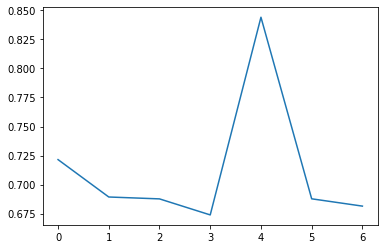

In [10]:
plt.plot(history.history['loss'])

## Do testing

In [15]:
test_dir = "./data_test"
test_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=test_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))

test_loss, test_acc = model.evaluate(test_data_gen)
print('\nTest accuracy: ', test_acc)

Found 195 images belonging to 2 classes.
7/7 [==============================] - 14s 2s/step - loss: 0.6887 - accuracy: 0.5692
\Test accuracy:  0.5692308


In [29]:
predictions = model.predict_generator(test_data_gen, test_data_gen.samples // batch_size+1)
pred = np.argmax(predictions, axis=1)
print('Confusion Matrix')
confusion = confusion_matrix(test_data_gen.classes, pred)
#print(confusion_matrix(test_data_gen.classes, pred))
print(confusion)
#plt.matshow(confusion, cmap='binary')
print('Classification Report')
target_names = ['Cars', 'E-Cars']
print(classification_report(test_data_gen.classes, pred, target_names=target_names))

Confusion Matrix
[[85 13]
 [79 18]]
Classification Report
              precision    recall  f1-score   support

        Cars       0.52      0.87      0.65        98
      E-Cars       0.58      0.19      0.28        97

    accuracy                           0.53       195
   macro avg       0.55      0.53      0.47       195
weighted avg       0.55      0.53      0.47       195



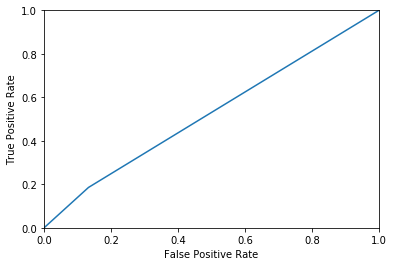

[0.         0.13265306 1.        ]
auc_score 0.5264569745423943


In [36]:
fpr , tpr , thresholds = roc_curve ( test_data_gen.classes , pred)
def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show()    
  print(fpr)
plot_roc_curve (fpr,tpr) 
print('auc_score', roc_auc_score(test_data_gen.classes, pred))

In [22]:
for i in np.random.choice(test_data_gen.shape[0], size=10):
    this_img = test_data_gen[i,:]
    prediction = model.predict(this_img[np.newaxis,:])
    max_class = np.argmax(prediction)
    
    plt.figure()
    plt.imshow(this_img.reshape((28,28)))
    plt.title("prediction: %d, actual: %d" %(max_class, y_test))

AttributeError: 'DirectoryIterator' object has no attribute 'shape'